In [1]:
from non_local_detector.simulate.sorted_spikes_simulation import make_simulated_data

(
    speed,
    position,
    spike_times,
    time,
    event_times,
    sampling_frequency,
    is_event,
    place_fields,
) = make_simulated_data(n_neurons=30)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/edeno/Documents/GitHub/non_local_detector/src/non_local_detector/likelihoods/clusterless_kde.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
from non_local_detector import NonLocalSortedSpikesDetector


detector = NonLocalSortedSpikesDetector()

is_training = ~is_event

results = detector.estimate_parameters(
    position_time=time,
    position=position,
    spike_times=spike_times,
    is_training=is_training,
    time=time,
    store_log_likelihood=True,
    max_iter=2,
)
results

Encoding models:   0%|          | 0/30 [00:00<?, ?cell/s]

Local Likelihood:   0%|          | 0/30 [00:00<?, ?cell/s]

No Spike Likelihood:   0%|          | 0/30 [00:00<?, ?cell/s]

Non-Local Likelihood:   0%|          | 0/30 [00:00<?, ?cell/s]

<xarray.Dataset>
Dimensions:                      (time: 97500, state_bins: 174, states: 4,
                                  state_ind: 174)
Coordinates:
  * time                         (time) float64 0.0 0.0006667 ... 65.0 65.0
  * state_bins                   (state_bins) object MultiIndex
  * state                        (state_bins) object 'Local' ... 'Non-Local F...
  * position                     (state_bins) float64 nan nan ... 167.0 169.0
  * state_ind                    (state_ind) int64 0 1 2 2 2 2 2 ... 3 3 3 3 3 3
  * states                       (states) <U20 'Local' ... 'Non-Local Fragmen...
    environments                 (states) <U1 '' '' '' ''
    encoding_groups              (states) int64 0 0 0 0
Data variables:
    acausal_posterior            (time, state_bins) float32 1.0 ... 0.005257
    acausal_state_probabilities  (time, states) float32 1.0 9.524e-19 ... 0.4511
Attributes:
    marginal_log_likelihoods:  [-13741.037 -12930.502]

In [3]:
import numpy as np

posterior = detector.get_conditional_non_local_posterior(results)
likelihood = np.exp(detector.log_likelihood_)[:, results.state_ind == 2]

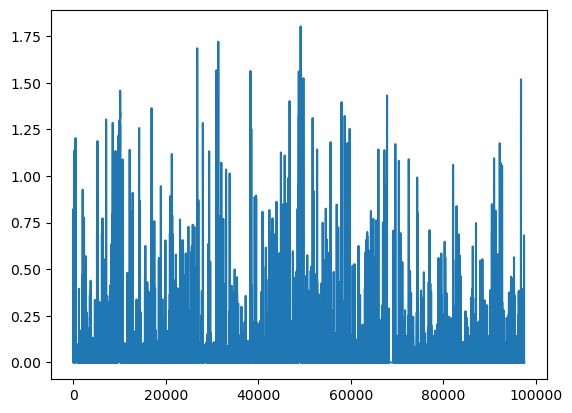

In [4]:
from non_local_detector.model_checking.posterior_consistency import (
    posterior_consistency_kl_divergence,
    posterior_consistency_hpd_overlap,
)
import matplotlib.pyplot as plt

plt.plot(posterior_consistency_kl_divergence(posterior, likelihood))

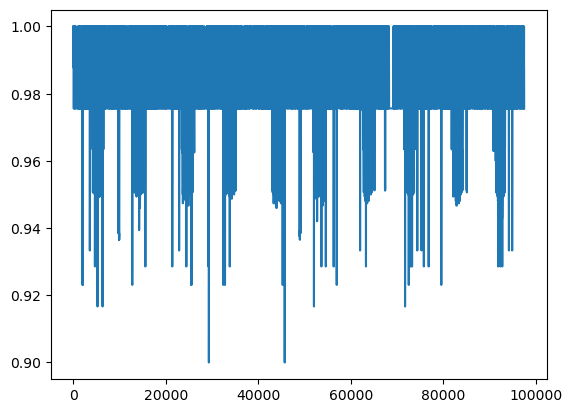

In [5]:
plt.plot(posterior_consistency_hpd_overlap(posterior, likelihood))

(array([0.]), array([inf]))

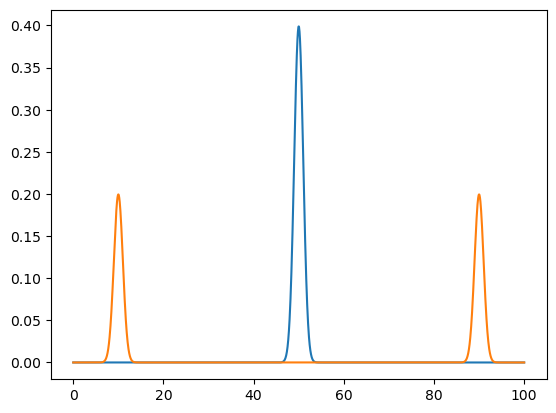

In [13]:
from scipy.stats import norm


x = np.linspace(0, 100, 2000)
post = norm.pdf(x, 50, 1)
like = 0.5 * norm.pdf(x, 10, 1) + 0.5 * norm.pdf(x, 90, 1)



plt.plot(x, post)
plt.plot(x, like)

posterior_consistency_hpd_overlap(
    post[None], like[None]
), posterior_consistency_kl_divergence(post[None], like[None])

(array([1.]), array([0.94334043]))

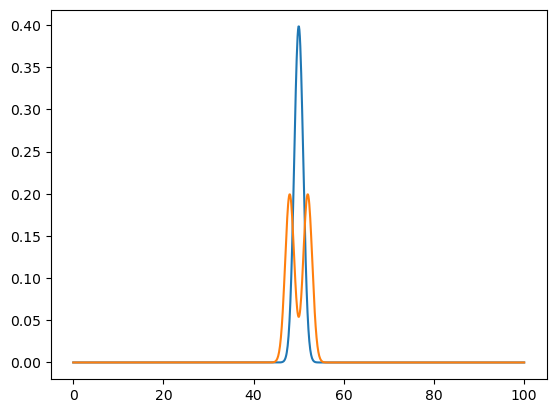

In [8]:
like = 0.5 * norm.pdf(x, 48, 1) + 0.5 * norm.pdf(x, 52, 1)

plt.plot(x, post)
plt.plot(x, like)

posterior_consistency_hpd_overlap(
    post[None], like[None]
), posterior_consistency_kl_divergence(post[None], like[None])

(array([0.48101266]), array([2.69335198]))

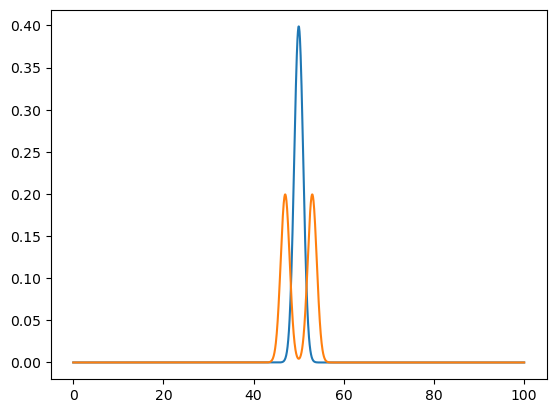

In [14]:
like = 0.5 * norm.pdf(x, 47, 1) + 0.5 * norm.pdf(x, 53, 1)

plt.plot(x, post)
plt.plot(x, like)

posterior_consistency_hpd_overlap(
    post[None], like[None]
), posterior_consistency_kl_divergence(post[None], like[None])